<a href="https://colab.research.google.com/github/Andrej-Ilin/practice/blob/main/Clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:


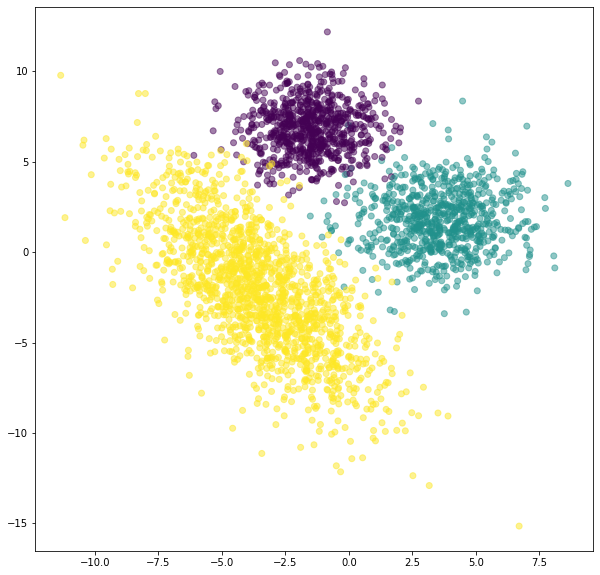

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [3]:
# Посмотрим распределение классов в датасете:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [4]:
# Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)
"""Для обучения модели K-means необходимо вызвать метод fit, передав входным
 параметром признаки объектов датасета:"""
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [5]:
#Обучив, мы можем получить центроиды кластеров:

k_means.cluster_centers_

array([[-3.18996384, -2.90484307],
       [-2.38363475,  6.23391526],
       [ 3.6296089 ,  1.74479425]])

In [6]:
# И узнать, в какой кластер попал каждый из объектов:

k_means.labels_

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

*Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.*

*Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:*

In [7]:
array_centroids = k_means.cluster_centers_
print(np.round(array_centroids).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


*Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.*

*Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:*

In [8]:
a = k_means.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

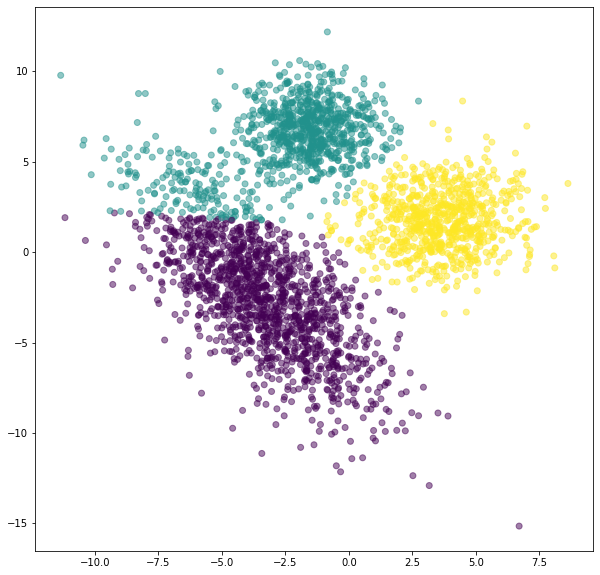

In [9]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

# ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ
___
Подгрузите данные и откройте их.

[СКАЧАТЬ ДАННЫЕ](https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/snsdata.csv)

В датасете для учеников предоставлены следующие признаки:

* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

*Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.*

*Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.*

*Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.*

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
data = pd.read_csv('/content/drive/MyDrive/all_data/snsdata.csv')

In [12]:
data.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0


In [13]:
data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1, inplace=True)

In [14]:
std = StandardScaler()
X = std.fit_transform(data)

In [15]:
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

*Укажите номер кластера, в который попало меньше всего учеников.*

In [16]:
a = k_means.labels_
_, counts = np.unique(a, return_counts=True)
f"Номер кластера {np.argmin(counts)}, количество всех {counts}"


'Номер кластера 5, количество всех [ 5036  1337   752   697 20024     1   846   466   841]'

In [17]:
data.groupby(a)

In [18]:
for k, group in data.groupby(a):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(20)
    print(top_words)

0
music           1.066521
dance           1.051033
shopping        0.890191
cute            0.828435
basketball      0.722597
hair            0.691223
mall            0.652502
football        0.617752
god             0.573272
church          0.496426
softball        0.477562
volleyball      0.414218
rock            0.394956
clothes         0.353455
hot             0.332407
baseball        0.329230
dress           0.322478
cheerleading    0.309571
sexy            0.287927
sports          0.286934
dtype: float64
1
drunk         1.409873
music         0.707554
hair          0.629020
god           0.522064
dance         0.439043
cute          0.384443
sex           0.380703
shopping      0.326103
mall          0.287210
die           0.275991
rock          0.237098
band          0.236350
football      0.214660
sexy          0.212416
basketball    0.202693
church        0.190726
clothes       0.163800
death         0.162304
hot           0.151832
kissed        0.142109
dtype: float64
2
band

# EM-algoritm

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

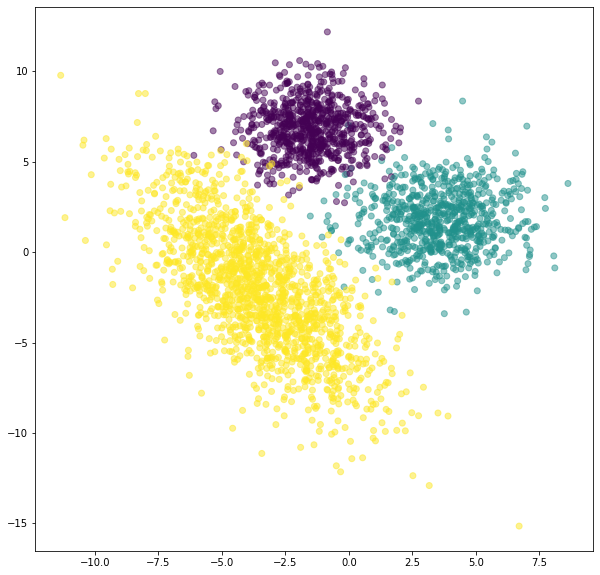

In [20]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [21]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [22]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42)

In [23]:
y_pred = gm.fit_predict(X)

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [24]:
a = gm.means_
(np.round(a).astype(np.int))

array([[ 4,  2],
       [-2,  7],
       [-4, -2]])

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [25]:
a = y_pred
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [29]:
data = pd.read_csv('/content/drive/MyDrive/all_data/snsdata.csv')
data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1, inplace=True)
gm = GaussianMixture(n_components=9, random_state=123)
std = StandardScaler()
X = std.fit_transform(data)
y_pred = gm.fit_predict(X)

In [39]:
y_pred[7]

3

Сколько итераций до схождения осуществил алгоритм? Вопрос относится к датасету об учениках старшей школы.

In [38]:
gm.n_iter_

23